In [30]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

file_paths = glob.glob('unclean_data/*.csv')

In [35]:
indicator_names = [
    "Adult Literacy Rate",
    "ICT Service Exports",
    "R&D Expenditure",
    "Journal Articles",
    "Patent Applications",
    "Mobile Subscriptions",
    "Fixed Broadband Subscriptions",
    "Secure Internet Servers (per million)",
    "Secure Internet Servers (alt)",
    "Internet Users",
    "ICT Goods Imports",
    "High-Tech Exports",
    "Tertiary Education Enrollment"
]

final_data = {}

for file_path, indicator in zip(file_paths, indicator_names):
    df = pd.read_csv(file_path, skiprows=4)
    
    df = df.drop(columns=['Indicator Name', 'Indicator Code'], errors='ignore')
    
    for _, row in df.iterrows():
        country = row['Country Name'].strip()
        if country not in final_data:
            final_data[country] = {}

        year_data = row.drop(labels=['Country Name', 'Country Code'], errors='ignore')
        year_data = year_data.dropna()

        if not year_data.empty:
            latest_value = year_data.iloc[-1]
            final_data[country][indicator] = latest_value
        else:
            final_data[country][indicator] = "NONE"

reshaped_df = pd.DataFrame.from_dict(final_data, orient='index')
reshaped_df.index.name = "Country"

reshaped_df.to_csv('cleaning_process/reshaped_data.csv', index=True)

print(reshaped_df.head())

                            Adult Literacy Rate ICT Service Exports  \
Country                                                               
Aruba                                  0.661533                NONE   
Africa Eastern and Southern            6.106573            0.586779   
Afghanistan                            7.828516                NONE   
Africa Western and Central             5.691769            0.151699   
Angola                                 45.41476             0.03229   

                            R&D Expenditure Journal Articles  \
Country                                                        
Aruba                                  NONE              1.0   
Africa Eastern and Southern        32147.61             NONE   
Afghanistan                          169.19             NONE   
Africa Western and Central         16427.93             NONE   
Angola                                44.99              2.0   

                            Patent Applications Mobil

In [37]:
egov_df = pd.read_csv('unclean_data/EGOV_DATA_2024.csv')
egov_df['Country'] = egov_df['Country Name'].str.strip()

reshaped_df_reset = reshaped_df.reset_index()

merged_df = pd.merge(reshaped_df_reset, egov_df, on='Country', how='outer')

merged_df = merged_df.fillna("NO CORRESPONDING COUNTRY")

merged_df = merged_df.set_index("Country")

merged_df.to_csv("cleaning_process/merged_data.csv")
print(merged_df.head())

                            Adult Literacy Rate ICT Service Exports  \
Country                                                               
Afghanistan                            7.828516                NONE   
Africa Eastern and Southern            6.106573            0.586779   
Africa Western and Central             5.691769            0.151699   
Albania                                3.013976             0.15412   
Algeria                                2.213114             0.47865   

                            R&D Expenditure Journal Articles  \
Country                                                        
Afghanistan                          169.19             NONE   
Africa Eastern and Southern        32147.61             NONE   
Africa Western and Central         16427.93             NONE   
Albania                              238.59             23.0   
Algeria                             7606.65            268.0   

                            Patent Applications Mobil

In [ ]:
df = pd.read_csv("cleaning_process/merged_data.csv")

country_name_map = {
    "Bahamas, The": "Bahamas",
    "Gambia, The": "Gambia",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Rep.": "Republic of the Congo",
    "Cote d'Ivoire": "Ivory Coast",
    "Czechia": "Czech Republic",
    "Egypt, Arab Rep.": "Egypt",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Rep.": "South Korea",
    "Korea, Dem. People's Rep.": "North Korea",
    "Democratic People's Republic of Korea": "North Korea",
    "Slovak Republic": "Slovakia",
    "Syrian Arab Republic": "Syria",
    "Russian Federation": "Russia",
    "Venezuela, RB": "Venezuela",
    "Hong Kong SAR, China": "Hong Kong",
    "Macao SAR, China": "Macau",
    "Micronesia, Fed. Sts.": "Micronesia",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Turkiye": "Turkey",
    "Yemen, Rep.": "Yemen",
    "United States": "United States of America",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Iran (Islamic Republic of)" : "Iran",
    "TÃ¼rkiye" : "Turkey",
    "Congo" : "Republic of the Congo",
    "Georgia (Country)" : "Georgia",
    "Kyrgyz Republic" : "Kyrgyzstan",
    "Lao People's Democratic Republic" : "Laos",
    "Lao PDR" : "Laos",
    "Micronesia (Federated States of)" : "Micronesia",
}

df['Country'] = df['Country'].replace(country_name_map)
df['Country Name'] = df['Country Name'].replace(country_name_map)

df['Country'] = df['Country'].str.strip()
df['Country Name'] = df['Country Name'].str.strip()

df.to_csv("cleaning_process/normalised_countries.csv", index=False)

print(df[['Country', 'Country Name']].drop_duplicates().sort_values('Country').head(20))

                        Country              Country Name
0                   Afghanistan               Afghanistan
1   Africa Eastern and Southern  NO CORRESPONDING COUNTRY
2    Africa Western and Central  NO CORRESPONDING COUNTRY
3                       Albania                   Albania
4                       Algeria                   Algeria
5                American Samoa  NO CORRESPONDING COUNTRY
6                       Andorra                   Andorra
7                        Angola                    Angola
8           Antigua and Barbuda       Antigua and Barbuda
9                    Arab World  NO CORRESPONDING COUNTRY
10                    Argentina                 Argentina
11                      Armenia                   Armenia
12                        Aruba  NO CORRESPONDING COUNTRY
13                    Australia                 Australia
14                      Austria                   Austria
15                   Azerbaijan                Azerbaijan
16            

In [ ]:
df = pd.read_csv("cleaning_process/normalised_countries.csv")

def merge_multiple_rows(group):
    base = group.iloc[0].copy()
    for i in range(1, len(group)):
        row = group.iloc[i]
        for col in group.columns:
            val = base[col]
            new_val = row[col]
            if (val in ["NO CORRESPONDING COUNTRY", None, ""] or pd.isna(val)) and \
               (new_val not in ["NO CORRESPONDING COUNTRY", None, ""] and pd.notna(new_val)):
                base[col] = new_val
    return base

merged_df = df.groupby("Country", as_index=False).apply(merge_multiple_rows).reset_index(drop=True)

merged_df.to_csv("cleaning_process/fully_merged_data.csv", index=False)

print(merged_df.head())

                       Country Adult Literacy Rate ICT Service Exports  \
0                  Afghanistan    7.82851624017411                NONE   
1  Africa Eastern and Southern    6.10657347896149   0.586779089135084   
2   Africa Western and Central    5.69176863421842   0.151699395451419   
3                      Albania    3.01397608748124   0.154119998216629   
4                      Algeria    2.21311390791552   0.478650003671646   

  R&D Expenditure Journal Articles Patent Applications Mobile Subscriptions  \
0          169.19             NONE         56.55443457            0.0800873   
1        32147.61             NONE                81.3                  1.0   
2        16427.93             NONE               100.8                  0.5   
3          238.59             23.0         97.88570679               22.472   
4         7606.65            268.0         109.1653573              12.0087   

  Fixed Broadband Subscriptions Secure Internet Servers (per million)  \
0      

C:\Users\Jakub\AppData\Local\Temp\ipykernel_37792\4080829804.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df = df.groupby("Country", as_index=False).apply(merge_multiple_rows).reset_index(drop=True)


In [46]:
df = pd.read_csv("cleaning_process/fully_merged_data.csv")

df_cleaned = df[~df.apply(lambda row: row.astype(str).str.contains("NO CORRESPONDING COUNTRY").any(), axis=1)]

df_cleaned.to_csv("cleaning_process/clean_data.csv", index=False)

print(df_cleaned.head())

       Country Adult Literacy Rate ICT Service Exports R&D Expenditure  \
0  Afghanistan    7.82851624017411                NONE          169.19   
3      Albania    3.01397608748124   0.154119998216629          238.59   
4      Algeria    2.21311390791552   0.478650003671646         7606.65   
6      Andorra    4.34892555438222                NONE             9.6   
7       Angola    45.4147601334516  0.0322900004684925           44.99   

  Journal Articles Patent Applications Mobile Subscriptions  \
0             NONE         56.55443457            0.0800873   
3             23.0         97.88570679               22.472   
4            268.0         109.1653573              12.0087   
6              3.0         142.2141211              51.7401   
7              2.0         67.37347427             0.373669   

  Fixed Broadband Subscriptions Secure Internet Servers (per million)  \
0               43.758544404586                                1814.0   
3              1220.3329094397

In [47]:
df = pd.read_csv("cleaning_process/clean_data.csv")

none_counts = df.apply(lambda row: (row == "NONE").sum(), axis=1)

df_filtered = df[none_counts < 4].reset_index(drop=True)

df_filtered.to_csv("cleaning_process/filtered_data.csv", index=False)

print(df_filtered.head())

       Country Adult Literacy Rate ICT Service Exports  R&D Expenditure  \
0  Afghanistan    7.82851624017411                NONE           169.19   
1      Albania    3.01397608748124   0.154119998216629           238.59   
2      Algeria    2.21311390791552   0.478650003671646          7606.65   
3      Andorra    4.34892555438222                NONE             9.60   
4       Angola    45.4147601334516  0.0322900004684925            44.99   

  Journal Articles  Patent Applications Mobile Subscriptions  \
0             NONE            56.554435            0.0800873   
1             23.0            97.885707               22.472   
2            268.0           109.165357              12.0087   
3              3.0           142.214121              51.7401   
4              2.0            67.373474             0.373669   

   Fixed Broadband Subscriptions  Secure Internet Servers (per million)  \
0                      43.758544                                 1814.0   
1             

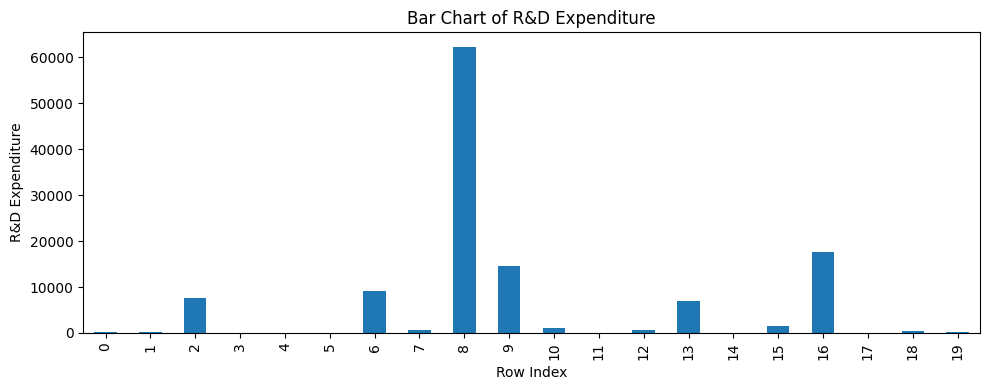

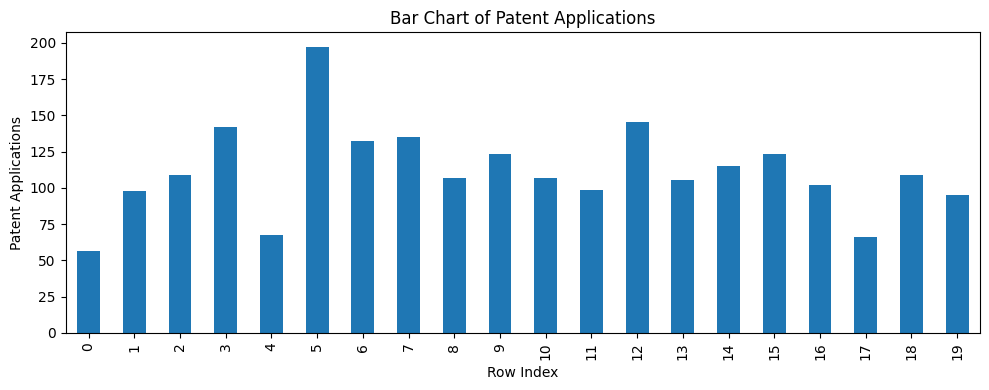

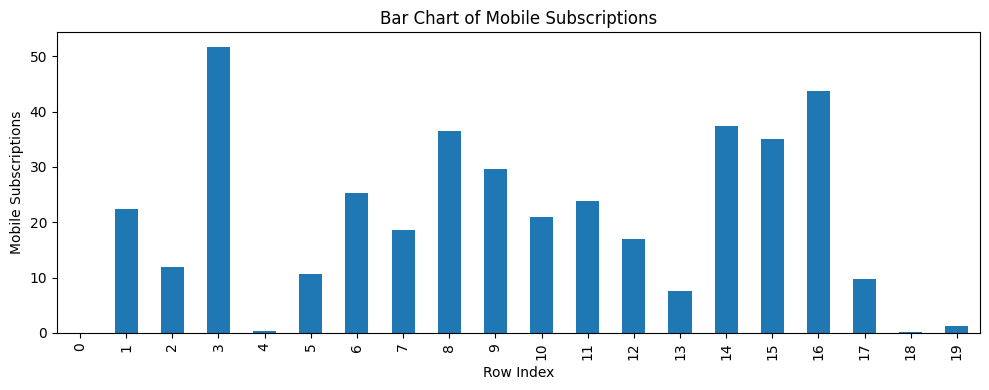

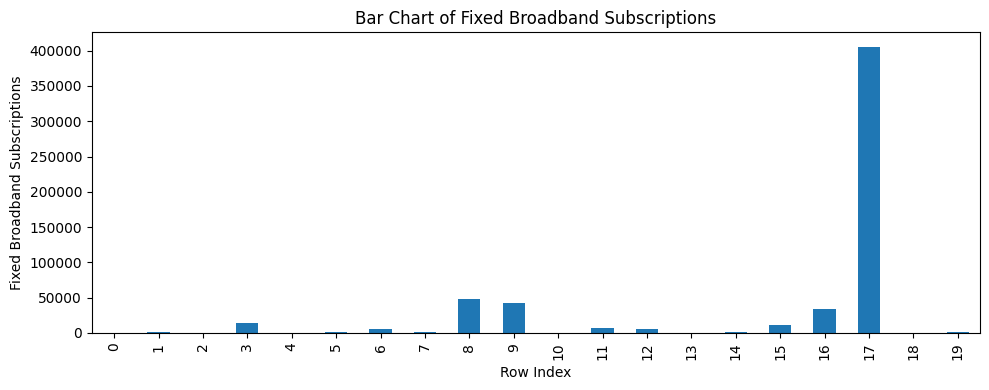

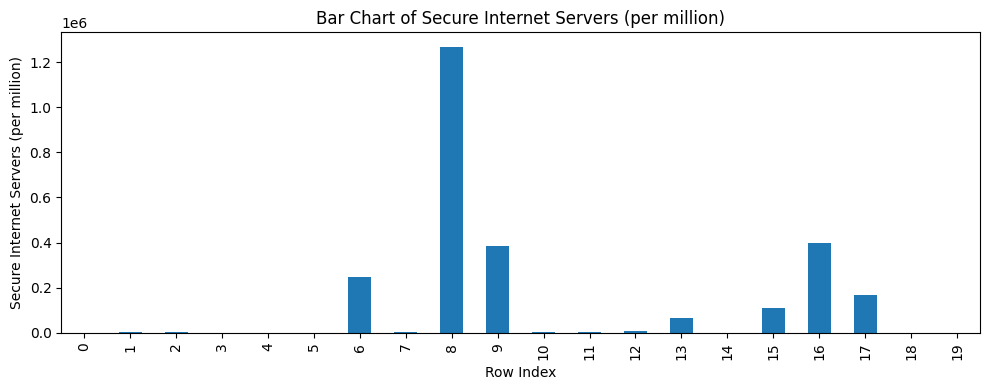

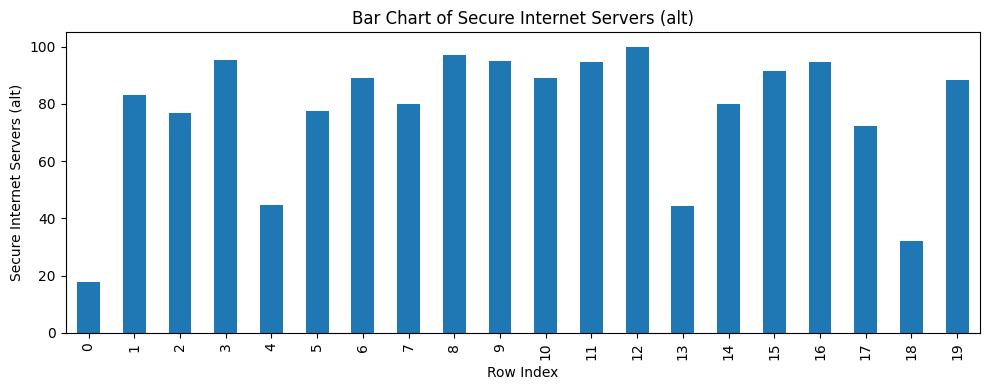

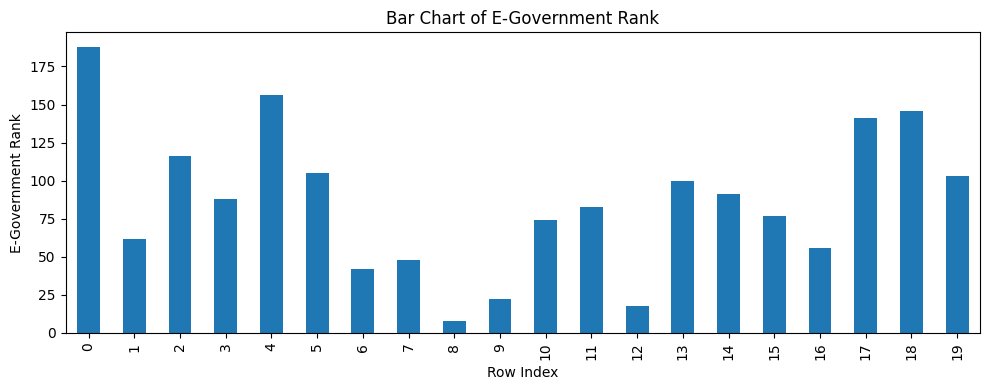

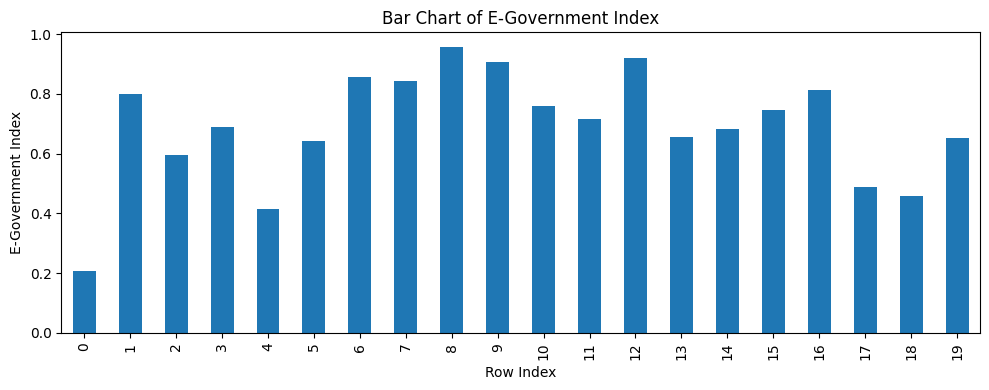

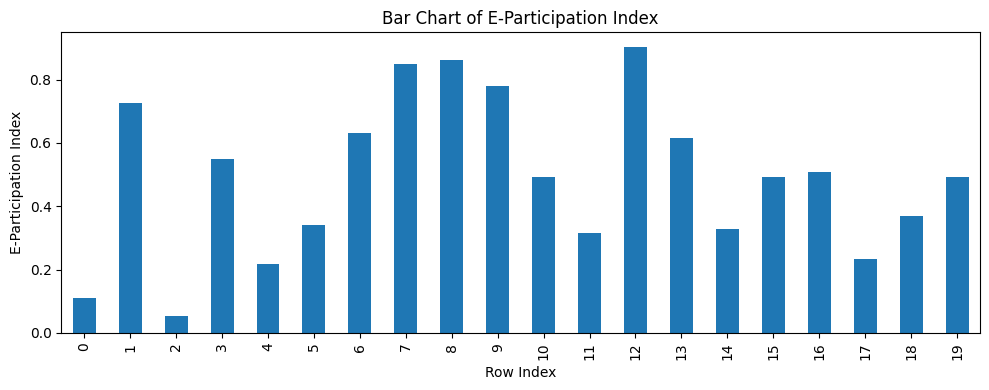

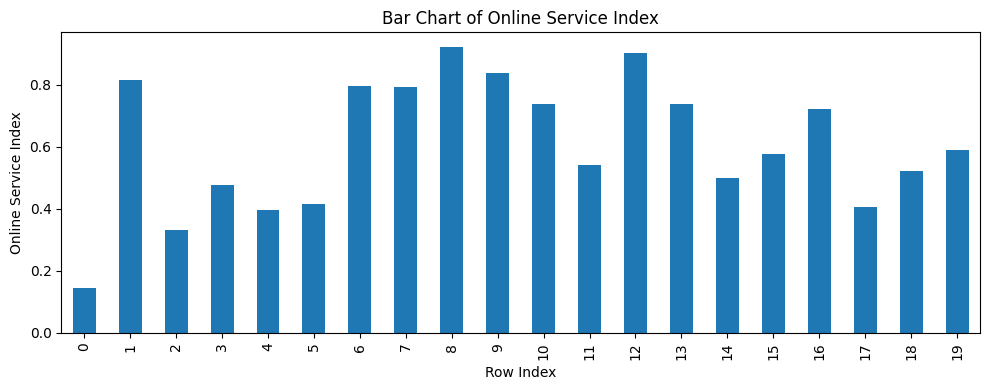

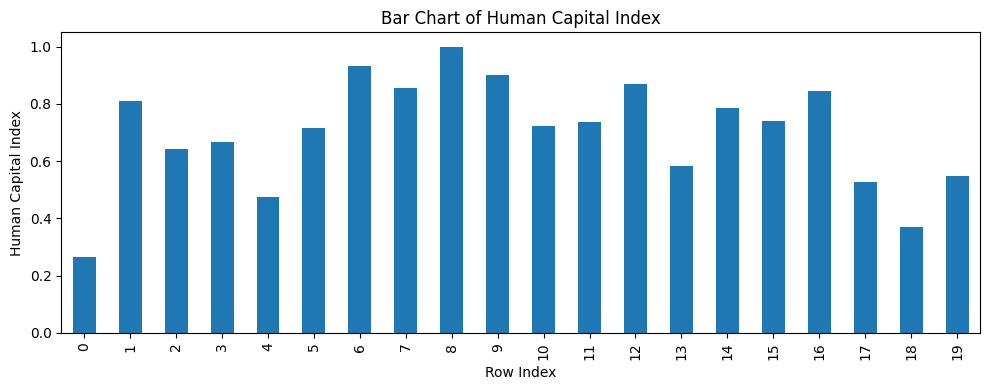

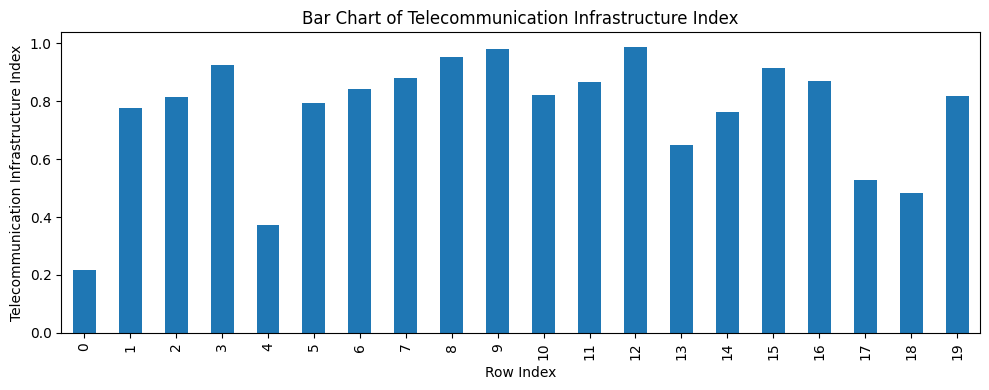

In [48]:
df = pd.read_csv("final_filtered_output.csv")

numeric_df = df.select_dtypes(include='number')

for column in numeric_df.columns:
    plt.figure(figsize=(10, 4))
    numeric_df[column].head(20).plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.ylabel(column)
    plt.xlabel('Row Index')
    plt.tight_layout()
    plt.show()

Skewness of numeric columns:
 Secure Internet Servers (per million)     12.396723
R&D Expenditure                            9.181443
Fixed Broadband Subscriptions              5.152022
Mobile Subscriptions                       0.519243
Patent Applications                        0.145015
E-Participation Index                      0.091265
E-Government Rank                          0.038445
Online Service Index                      -0.255257
E-Government Index                        -0.442328
Human Capital Index                       -0.506932
Secure Internet Servers (alt)             -0.815866
Telecommunication Infrastructure Index    -0.864754
dtype: float64


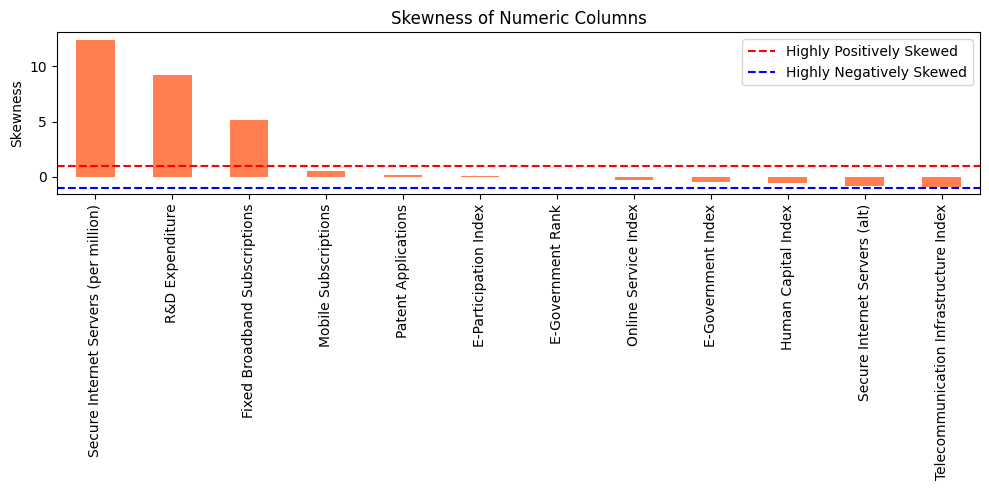

In [49]:
df = pd.read_csv("final_filtered_output.csv")

numeric_df = df.select_dtypes(include='number')

skewness = numeric_df.skew().sort_values(ascending=False)
print("Skewness of numeric columns:\n", skewness)

plt.figure(figsize=(10, 5))
skewness.plot(kind='bar', color='coral')
plt.title("Skewness of Numeric Columns")
plt.ylabel("Skewness")
plt.axhline(1, color='red', linestyle='--', label='Highly Positively Skewed')
plt.axhline(-1, color='blue', linestyle='--', label='Highly Negatively Skewed')
plt.legend()
plt.tight_layout()
plt.show()